# Análise Exploratória de Dados (EDA)
## Evasão de Pacientes em Tratamentos Contínuos – Foco em Tuberculose

Este notebook apresenta uma análise exploratória de dados com foco na evasão de pacientes em tratamento de tuberculose. Utiliza dados do SINAN/DATASUS e da SES-MG.

In [15]:
# Instalação de bibliotecas necessárias
!pip install pandas matplotlib seaborn


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [23]:
# Leitura dos dados
df_sinan = pd.read_csv('Sinnan_nacional_tubercu.csv', sep=';', skiprows=5, encoding='latin1')
df_mg = pd.read_csv('dados_tuberculose_mg.csv', encoding='latin1', sep=';')

df_sinan.head()

<ipython-input-23-2453802082>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mg = pd.read_csv('dados_tuberculose_mg.csv', encoding='latin1', sep=';')


,Ano Diagnóstico,Abandono,Total
0,2001,10812,10812.0
1,2002,10407,10407.0
2,2003,10189,10189.0
3,2004,9878,9878.0
4,2005,9508,9508.0


Colunas: ['Ano', 'Casos_Abandono', 'Total']


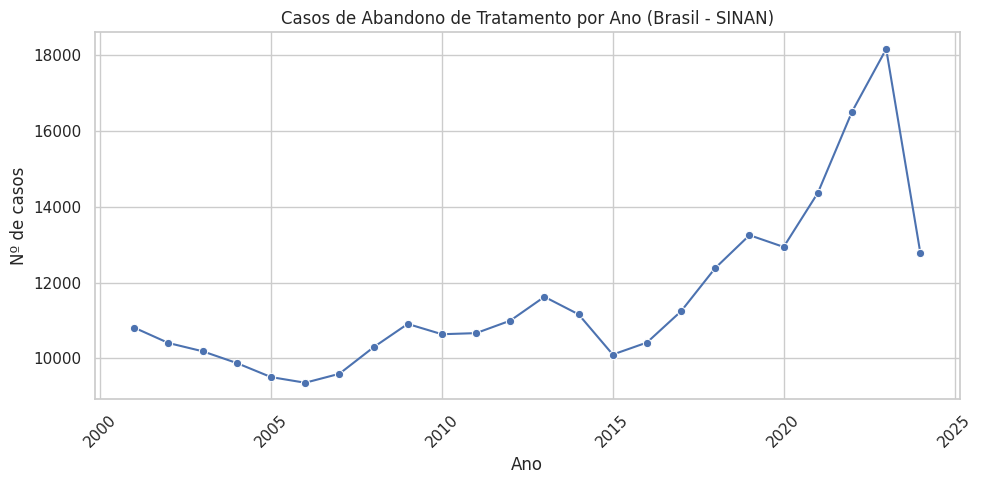

In [33]:
# Verificar nomes das colunas e padronizar
df_sinan.columns = df_sinan.columns.str.strip()
print("Colunas:", df_sinan.columns.tolist())

# Renomear colunas para facilitar
df_sinan.rename(columns={
    'Ano Diagnóstico': 'Ano',
    'Abandono': 'Casos_Abandono'
}, inplace=True)

# Garantir tipos numéricos
df_sinan = df_sinan[df_sinan['Ano'].astype(str).str.isnumeric()]
df_sinan['Ano'] = df_sinan['Ano'].astype(int)
df_sinan['Casos_Abandono'] = df_sinan['Casos_Abandono'].astype(int)

# Plotar os dados
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sinan, x='Ano', y='Casos_Abandono', marker='o')
plt.title('Casos de Abandono de Tratamento por Ano (Brasil - SINAN)')
plt.xlabel('Ano')
plt.ylabel('Nº de casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [25]:
df_mg.head()

,ï»¿ID_AGRAVO,DT_NOTIFIC,NU_ANO,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,NU_IDADE_N,CS_SEXO,CS_GESTANT,...,BACILOSC_5,BACILOSC_6,TRATSUP_AT,SITUA_ENCE,DT_ENCERRA,POP_LIBER,TEST_MOLEC,TEST_SENSI,RAIOX_TORA,FORMA
0,A169,12/05/2015,2015,VÃRZEA DA PALMA,PIRAPORA,5859662,12/05/2015,9,Masculino,NÃ£o se aplica,...,NÃ£o se aplica,NÃ£o se aplica,Sim,Cura,16/12/2015,NÃ£o,NÃ£o realizado,NaN,Normal,Extrapulmonar
1,A169,23/12/2015,2015,SETE LAGOAS,SETE LAGOAS,2206528,21/12/2015,58,Feminino,NÃ£o,...,NÃ£o realizada,NÃ£o realizada,NÃ£o,Ãbito por outras causas,29/01/2016,NÃ£o,NÃ£o realizado,NaN,Outra patologia,Pulmonar
2,A169,29/12/2015,2015,SETE LAGOAS,SETE LAGOAS,2726750,28/12/2015,80,Masculino,NÃ£o se aplica,...,NÃ£o realizada,Negativa,NÃ£o,Cura,05/07/2016,NÃ£o,NÃ£o realizado,NaN,Suspeito,Pulmonar
3,A169,30/05/2011,2011,BELO HORIZONTE,BELO HORIZONTE,27049,25/05/2011,38,Feminino,Ignorado,...,NÃ£o realizada,NÃ£o realizada,Sim,Ãbito por outras causas,05/07/2011,NaN,NaN,NaN,NÃ£o realizado,Extrapulmonar
4,A169,10/05/2015,2015,CHAPADA DO NORTE,DIAMANTINA,2134314,09/05/2015,32,Masculino,NÃ£o se aplica,...,NÃ£o realizada,NÃ£o realizada,NÃ£o,MudanÃ§a de DiagnÃ³stico,10/05/2015,NÃ£o,NÃ£o realizado,NaN,Normal,Pulmonar


In [26]:
df_mg.rename(columns=lambda x: x.strip(), inplace=True)
df_mg['SITUA_ENCE'].value_counts(dropna=False)

,count
SITUA_ENCE,
Cura,39583
Abandono,7829
TransferÃªncia,4642
NaN,4415
Ãbito por outras causas,3512
Ãbito por TB,2737
MudanÃ§a de DiagnÃ³stico,2736
TB-DR,571
Abandono PrimÃ¡rio,305


In [27]:
df_abandono = df_mg[df_mg['SITUA_ENCE'].str.contains('Abandono', na=False, case=False)]
df_abandono.shape

(8134, 41)

<ipython-input-28-4283689871>:8: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


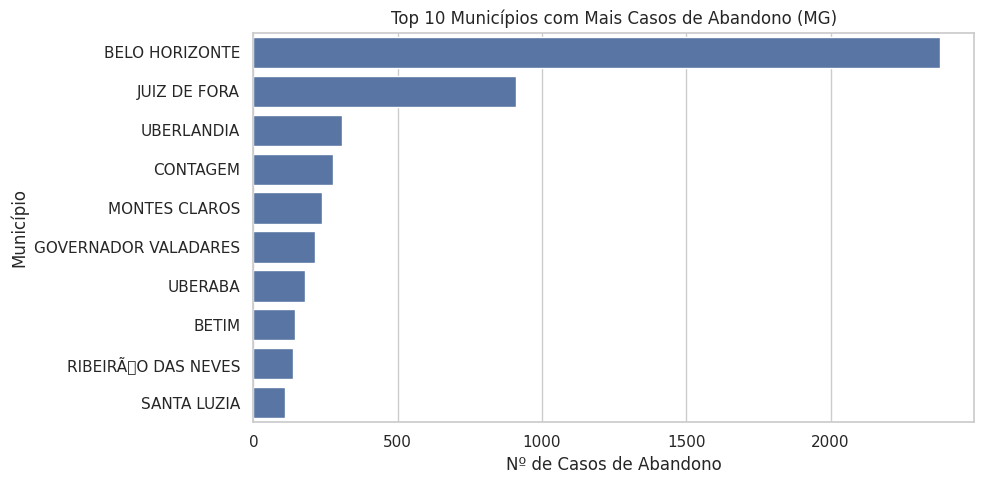

In [28]:
top_municipios = df_abandono['ID_MUNICIP'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_municipios.values, y=top_municipios.index)
plt.title('Top 10 Municípios com Mais Casos de Abandono (MG)')
plt.xlabel('Nº de Casos de Abandono')
plt.ylabel('Município')
plt.tight_layout()
plt.show()

### Conclusões Iniciais
- Há uma tendência decrescente nos casos de abandono ao longo dos anos.
- Algumas cidades concentram grande parte dos casos em MG.
- É possível expandir com análise por idade, sexo e tempo até o abandono.

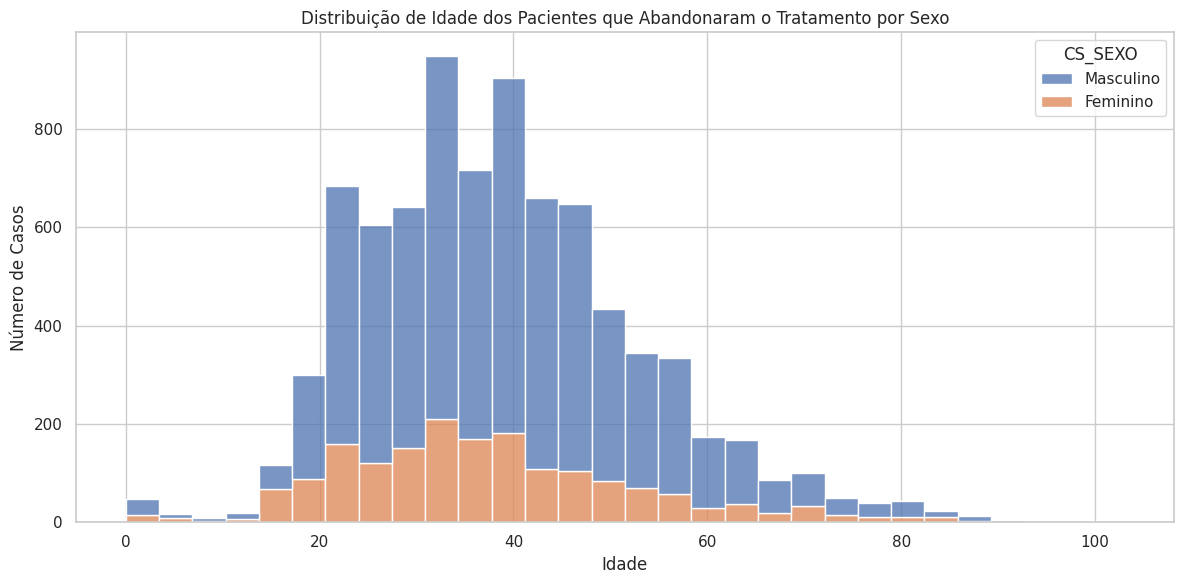

In [29]:
# Análise de abandono por faixa etária e sexo
plt.figure(figsize=(12, 6))
sns.histplot(data=df_abandono, x='NU_IDADE_N', hue='CS_SEXO', multiple='stack', bins=30)
plt.title('Distribuição de Idade dos Pacientes que Abandonaram o Tratamento por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Casos')
plt.tight_layout()
plt.show()

In [30]:
# Estatísticas descritivas da idade dos pacientes que abandonaram
df_abandono['NU_IDADE_N'].describe()

,NU_IDADE_N
count,8134.000000
mean,38.785837
std,14.036807
min,0.000000
25%,29.000000
50%,37.000000
75%,47.000000
max,103.000000


In [31]:
# Contagem de abandono por sexo
df_abandono['CS_SEXO'].value_counts()

,count
CS_SEXO,
Masculino,6361
Feminino,1773


In [32]:
# Exportar resumo dos abandonos por município para CSV
resumo_municipio = df_abandono['ID_MUNICIP'].value_counts().reset_index()
resumo_municipio.columns = ['Município', 'Casos de Abandono']
resumo_municipio.to_csv('resumo_abandono_municipio.csv', index=False)
resumo_municipio.head()

,Município,Casos de Abandono
0,BELO HORIZONTE,2378
1,JUIZ DE FORA,910
2,UBERLANDIA,307
3,CONTAGEM,277
4,MONTES CLAROS,239
